
📊 Métricas para Modelo Base
MAE : 2.372866666666667
MSE : 7.903623451282053
RMSE: 2.811338373672236
R²  : 0.8005805683973006

📊 Métricas para Modelo Optuna
MAE : 2.3855090930837277
MSE : 7.7424429157032035
RMSE: 2.7825245579694715
R²  : 0.8046473778788858


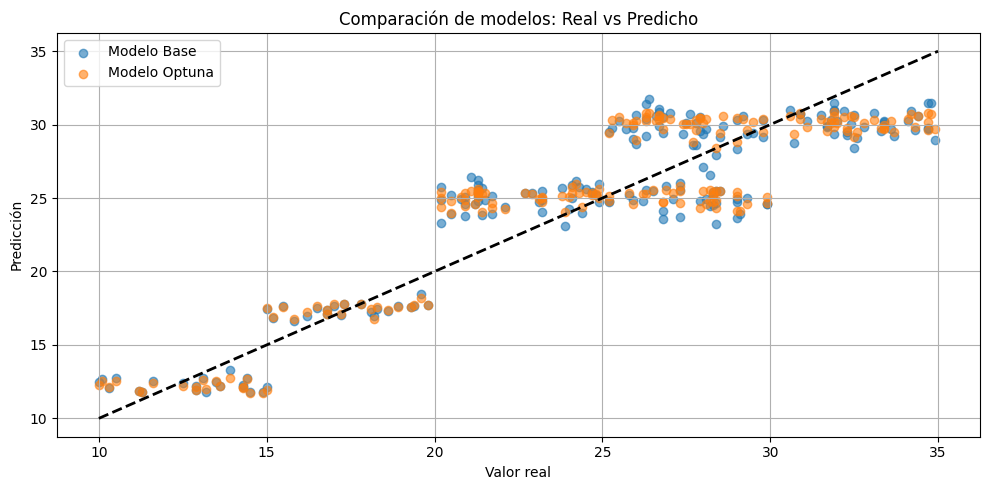

In [1]:
# 08_Comparar_modelos.ipynb

# ===============================
# 🔹 1. Importaciones
# ===============================
import pandas as pd
import numpy as np
import joblib
import os
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# ===============================
# 🔹 2. Cargar datos de test
# ===============================
df = pd.read_csv("data/interim/feature_engineered_data.csv")
target_col = "Fat_Percentage"
X = df.drop(columns=[target_col])
y = df[target_col]

# División consistente
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ===============================
# 🔹 3. Cargar modelos
# ===============================
model_base = joblib.load("models/rf_pipeline.pkl")
model_optuna = joblib.load("models/rf_pipeline_optuna.pkl")

# ===============================
# 🔹 4. Hacer predicciones
# ===============================
y_pred_base = model_base.predict(X_test)
y_pred_optuna = model_optuna.predict(X_test)

# ===============================
# 🔹 5. Función para mostrar métricas
# ===============================
def mostrar_metricas(y_true, y_pred, nombre_modelo):
    print(f"\n📊 Métricas para {nombre_modelo}")
    print("MAE :", mean_absolute_error(y_true, y_pred))
    print("MSE :", mean_squared_error(y_true, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))
    print("R²  :", r2_score(y_true, y_pred))

mostrar_metricas(y_test, y_pred_base, "Modelo Base")
mostrar_metricas(y_test, y_pred_optuna, "Modelo Optuna")

# ===============================
# 🔹 6. Comparación visual
# ===============================
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred_base, alpha=0.6, label="Modelo Base")
plt.scatter(y_test, y_pred_optuna, alpha=0.6, label="Modelo Optuna")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel("Valor real")
plt.ylabel("Predicción")
plt.title("Comparación de modelos: Real vs Predicho")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()